# Lista de Exercício 01 - Modelagem e Simulação

> Guilherme Alves Carvalho - 11921BCC016

initialize + utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def experimentMeans(experiment, qnt = 5):
    results = []
    for i in range(qnt):
        results.append(experiment())
    return np.mean(results)

## Exercício 1

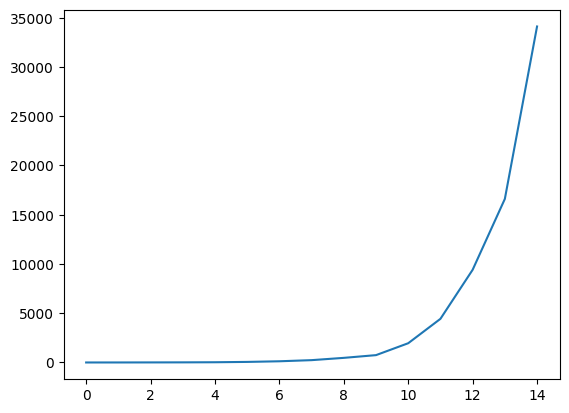

In [17]:
def nFollowingHeads(n):
    consecutiveNs = 0

    samplesDone = 0
    while consecutiveNs != n:
      sample = np.random.choice(['H', 'T'])

      if sample == 'H':
        consecutiveNs += 1
      else:
        consecutiveNs = 0
      samplesDone += 1
        
    return samplesDone
  
n = 15
results = []

for i in range(n):
   results.append(
      experimentMeans(lambda: nFollowingHeads(i), 50)
   )

plt.plot(results)

## Exercício 2

### Letra A

In [28]:
def experiment():
  samples = []
  for j in range(1000):
    comum = np.random.choice(range(1, 7))
    vantagem = np.random.choice(range(1, 7), 2).max()
    samples.append(comum < vantagem)
  return np.mean(samples)
  
print(experimentMeans(experiment, 100))
# a vantagem é melhor em média 7% que a normal

0.58257


### Letra B e C

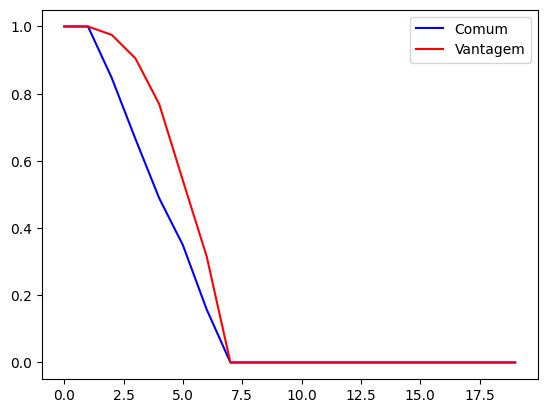

Percebe-se que a vantagem é melhor pois permite um relançamento, o que aumenta a chance de se obter um número maior.


In [4]:
porcentagensComum = []
porcentagensVantagem = []

for i in range(20):
  samplesComum = []
  samplesVantagem = []

  for j in range(1000):
    comum = np.random.choice(range(1, 7))
    vantagem = np.random.choice(range(1, 7), 2).max()

    samplesComum.append(comum >= i)
    samplesVantagem.append(vantagem >= i)

  porcentagensComum.append(np.mean(samplesComum))
  porcentagensVantagem.append(np.mean(samplesVantagem))

plt.plot(porcentagensComum, label='Comum', color='blue')
plt.plot(porcentagensVantagem, label='Vantagem', color='red')
plt.legend()
plt.show()

# c
print('Percebe-se que a vantagem é melhor pois permite um relançamento, o que aumenta a chance de se obter um número maior.')

## Exercício 3

In [4]:
def experiment(n):
  throws = 1
  sample = np.random.choice(['H', 'T'], n)

  while len(sample) != 0:

    tailsCount = np.count_nonzero(sample == 'T')
    sample = np.random.choice(['H', 'T'], tailsCount)

    throws += 1


  return throws

results = []

for i in range(1, 7000):
  results.append(experimentMeans(lambda: experiment(i)))

print(np.mean(results))

13.660951564509215


## Exercício 4

In [ ]:
??????

## Exercício 5

### Letra A

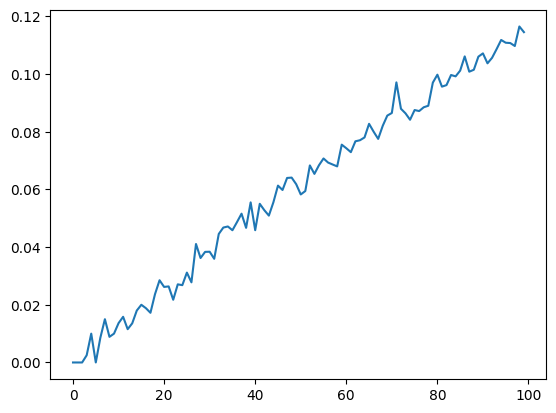

In [12]:
def experiment(n, size = 1):
    nivers = np.array([0 for _ in range(0, 365)])
    
    for _ in range(n):
        nivers[np.random.randint(365)] += 1

    return np.count_nonzero(nivers > size)

results = []
for i in range(1, 101):
    results.append(experimentMeans(lambda: experiment(i), 100) / i)

plt.plot(results)

### Letra B

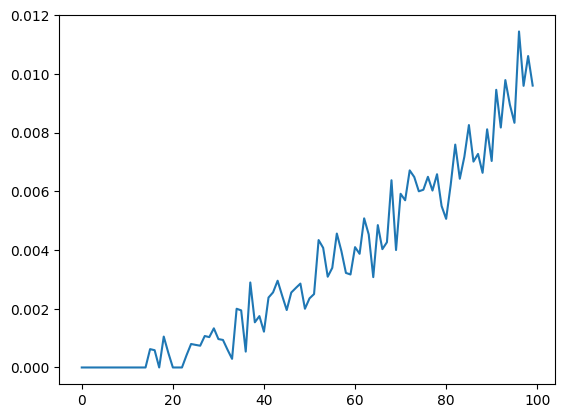

In [13]:
results = []
for i in range(1, 101):
    results.append(experimentMeans(lambda: experiment(i, 2), 100) / i)

plt.plot(results)

## Exercício 6

### Letra A

In [ ]:
def experiment():
    coordBebado = (0, 0)
    passos = 0
    while np.hypot(coordBebado[0], coordBebado[1]) <= 5:
      deslocamento = (np.random.randint(-1, 1), np.random.randint(-1, 1))
      coordBebado += deslocamento
      passos += 1
    

    